In [4]:
#pip install pandas scikit-learn matplotlib seaborn tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("adult.csv") 
print(df.head())
print(df.info())


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [3]:

df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)


cat_columns = df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in cat_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop('income', axis=1)
y = df['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
!pip install tensorflow

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


C:\Users\megha\.conda\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


Epoch 1/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8056 - loss: 0.4143 - val_accuracy: 0.8509 - val_loss: 0.3398
Epoch 2/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8320 - loss: 0.3558 - val_accuracy: 0.8576 - val_loss: 0.3279
Epoch 3/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8380 - loss: 0.3426 - val_accuracy: 0.8564 - val_loss: 0.3263
Epoch 4/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8415 - loss: 0.3372 - val_accuracy: 0.8572 - val_loss: 0.3264
Epoch 5/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8431 - loss: 0.3348 - val_accuracy: 0.8582 - val_loss: 0.3254
Epoch 6/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8451 - loss: 0.3331 - val_accuracy: 0.8578 - val_loss: 0.3257
Epoch 7/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8446 - loss: 0.3304 - val_accuracy: 0.8555 - val_loss: 0.3260
Epoch 8/30
652/652 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8459 - loss: 0.3280 - val_accuracy: 0.

In [7]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

y_pred = model.predict(X_test).flatten()
y_pred_class = (y_pred > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred_class)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.8497
MSE: 0.1018
R² Score: 0.4356


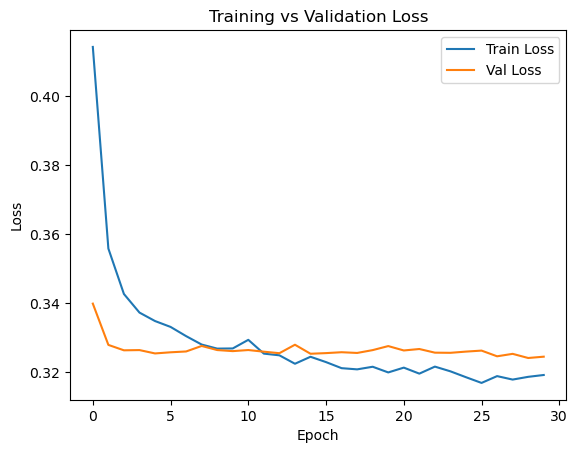

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
